
Checking stationarity for FGEXPND:
ADF Statistic: -3.6822, p-value: 0.0044

Checking stationarity for GPDI:
ADF Statistic: -5.6671, p-value: 0.0000

Checking stationarity for OPHNFB:
ADF Statistic: -8.2780, p-value: 0.0000
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 03, Feb, 2025
Time:                     20:30:02
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    17.5885
Nobs:                     302.000    HQIC:                   17.0358
Log likelihood:          -3727.29    FPE:                1.73345e+07
AIC:                      16.6671    Det(Omega_mle):     1.36549e+07
--------------------------------------------------------------------
Results for equation FGEXPND
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
co

/var/folders/6t/1_v9ync132lgs0k2f0d3t9mc0000gn/T/ipykernel_11579/3264271866.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/macroeconomic_data.csv", parse_dates=["Date"], index_col="Date")
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/6t/1_v9ync132lgs0k2f0d3t9mc0000gn/T/ipykernel_11579/3264271866.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version,

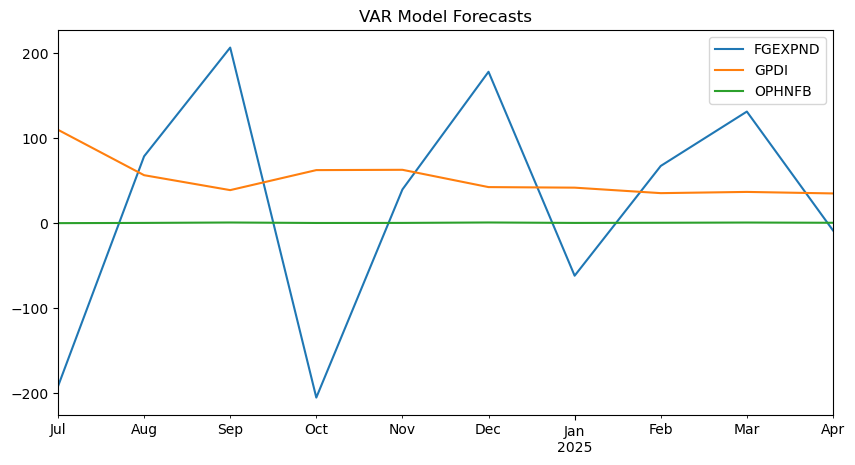

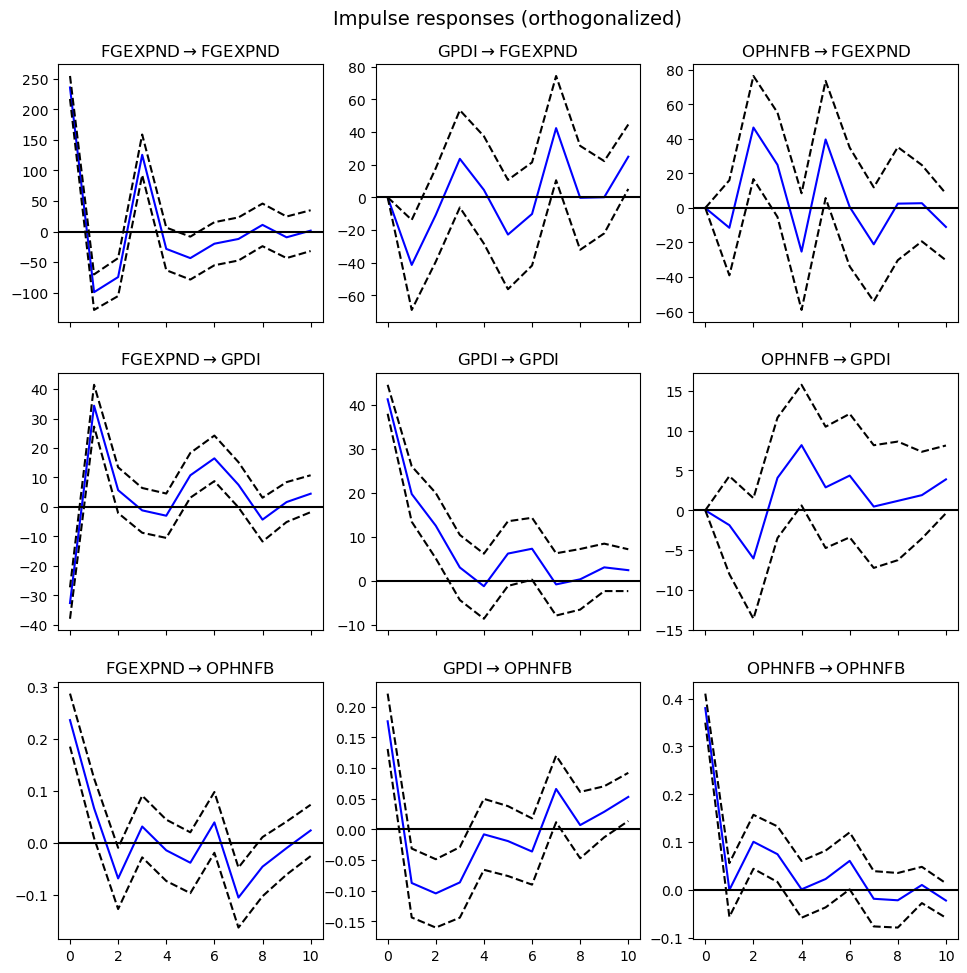

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("../data/macroeconomic_data.csv", parse_dates=["Date"], index_col="Date")

#Differencing the data to ensure stationarity
df_diff = df.diff().dropna()

#Check stationarity (Augmented Dickey-Fuller Test)
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.4f}, p-value: {result[1]:.4f}")
    return result[1] < 0.05  # Returns True if stationary

for col in df_diff.columns:
    print(f"\nChecking stationarity for {col}:")
    check_stationarity(df_diff[col])

model = VAR(df_diff)
results = model.fit(maxlags=10, ic="aic")  # Select optimal lags using AIC

print(results.summary())

lag_order = results.k_ar
forecast_input = df_diff.values[-lag_order:]
forecast = results.forecast(forecast_input, steps=10)

#Forecast
forecast_df = pd.DataFrame(forecast, columns=df_diff.columns)
forecast_df.index = pd.date_range(start=df_diff.index[-1], periods=10, freq="M")

forecast_df.plot(title="VAR Model Forecasts", figsize=(10, 5))
plt.show()

#Impulse Response Function (IRF)
irf = results.irf(10)  # 10-period IRF
irf.plot(orth=True)
plt.show()
